> **DO NOT EDIT IF INSIDE `caobd_s19` folder** 

# Assignment 1

**Handin in Peergrade**: *Wednesday*, February 13, 2019, 23:59<br>
**Peergrading deadline**: *Sunday*, February 16, 2019, 23:59<br>
**Peergrading feedback deadline**: *Wednesday*, February 20, 2019, 23:59

[**Feedback**](http://ulfaslak.com/vent)

## Problems

### Week 1

>**Ex 1.1.10**: `dict`s and `defaultdict`s.
1. What is a `defaultdict`? How would you say it is different from a normal Python `dict`?
2. Write some code that takes a list of tuples:

>        l = [("a", 1), ("b", 3), ("a", None), ("c", False), ("b", True), ("a", None)]

>     And produces a `defaultdict` object

>        defaultdict(<type 'list'>, {'a': [1, None, None], 'c': [False], 'b': [3, True]})

>*Hint: you can import `defaultdict` from `collections`*

In [1]:
from collections import defaultdict

l = [("a", 1), ("b", 3), ("a", None), ("c", False), ("b", True), ("a", None)]

dd = defaultdict(list)
for k, v in l:
    dd[k].append(v)
    
print(dd)

defaultdict(<class 'list'>, {'a': [1, None, None], 'b': [3, True], 'c': [False]})


>**Ex. 1.2.4**: The URL reveals that the data is from reddit/r/gameofthrones, but can you recover that information from the data? Give your answer by 'keying' into the JSON data using square brackets.

>*Hint: 'Keying' is a word i just made up. By it, I mean the following. Consider a JSON object such as:*
>
>        my_json_obj = {
>            'cats': {
>                'awesome': ['Missy'],
>                'useless': ['Kim', 'Frank', 'Sandy']
>            },
>            'dogs': {
>                'awesome': ['Finn', 'Dolores', 'Fido', 'Casper'],
>                'useless': []
>            }
>        }
>
>*I can get the list of useless cats by keying into `my_json_obj` like such:*
>
>        >>> my_json_obj['cats']['useless']
>        Out [ ]: ['Kim', 'Frank', 'Sandy']
>
>*`my_json_obj['cats']` returns the dictionary `{'awesome': ['Missy'], 'useless': ['Kim', 'Frank', 'Sandy']}` and getting '`useless`' from that eventually gives us `['Kim', 'Frank', 'Sandy']`. If any of those list items were a list of a dictionary themselves, we could have kept keying deeper into the structure.*

In [4]:
import requests as rq

data = rq.get("https://www.reddit.com/r/gameofthrones/.json", headers={'user-agent': 'ulf'}).json()

In [8]:
data['data']['children'][0]['data']['subreddit']

'gameofthrones'

>**Ex 1.2.5**: Write two `for` loops (or list comprehensions for extra street credits) which:
>1. Counts the number of spoilers.
>2. Only prints headlines that aren't spoilers.

In [13]:
# Count spoilers
n_spoilers = 0
for child in data['data']['children']:
    n_spoilers += child['data']['spoiler']
    
# Print non-spoilers
for child in data['data']['children']:
    if not child['data']['spoiler']:
        print(child['data']['title'])

[SPOILERS] Excited for the new season? Join the discussion on our Discord!
[Spoilers] I've always loved this scene with Brienne, and I try to keep it in mind when I feel like a whiny little bitch for no good reason. I made this little thing a year or so ago as a reminder to keep on keepin' on, and I thought I'd share with y'all.
[NO SPOILERS] Here's my Jon Snow cosplay... So hyped for Season 8!
[SPOILERS] Currently on season 4 and this scene from episode 6 might be my favorite part of the entire series so far
[Spoilers] Found a picture of a GoT S8 Pool and redone it to share it with you
[NO SPOILERS] Gearing up for the finale
[NO SPOILERS] Yesterday I asked for ideas for my coasters. Here are the finished results. (imgur link in comments)
[NO SPOILERS] I had to force my artistic friend to start GOT four times before she finally got hooked, but now that she is...
[no spoilers] drew a Targaryen sigil, how did I do?
[NO SPOILERS] Help for my promposal
[NO SPOILERS] Daenerys Targaryen's qu

### Week 2

>**Ex. 2.1.2**: The `get_x_y` function below gives you the number of comments versus score for the latest `N` posts on a given `subreddit`.
3. In two seperate figures, floating side by side, scatter plot (left) the set of x and y variables for "blackmirror" and (right) x and y for "news". Remember to transform the data. My figure looks like [this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_2.2b.png).
4. Comment on any differences you see in the trends. Why might number of comments versus post upvotes look different for a TV-show than for world news?
>
>*Hint: By "transformation" I explicitly mean that you map some function onto every value in a list of values. Example: I can apply a square root transformation like `x = [np.sqrt(v) for v in x]`. A faster way to do that, of course, would be just `x = np.sqrt(x)`.*

In [ ]:
import requests as rq

def get_x_y(subreddit, N, count=25):
    
    def _get_data(subreddit, count, after):
        url = "https://www.reddit.com/r/%s/.json?count=%d&after=%s" % (subreddit, count, after)
        data = rq.get(url, headers = {'User-agent': 'sneakybot'}).json()
        print("Retrieved %d posts from page %s" % (count, after))
        return data
    
    after = ""

    x, y = [], []
    for n in range(N//count):
        data = _get_data(subreddit, count, after)
        for d in data['data']['children']:
            x.append(d['data']['num_comments'])
            y.append(d['data']['score'])
        after = data['data']['after']

    return x, y
                          
#x, y = get_x_y("news", 500, count=25)

In [ ]:
x_tv, y_tv = get_x_y("blackmirror", 500, count=25)
x_ne, y_ne = get_x_y("news", 500, count=25)

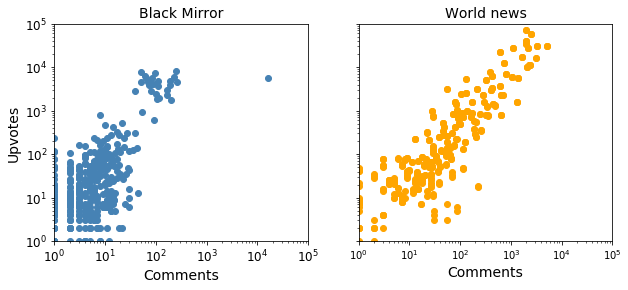

In [20]:
%matplotlib inline
import matplotlib.pylab as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

ax[0].set_title("Black Mirror", fontsize=14)
ax[1].set_title("World news", fontsize=14)
ax[0].scatter(x_tv, y_tv, c="steelblue")
ax[1].scatter(x_ne, y_ne, c="orange")

ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlim(1, 1e5)
ax[0].set_ylim(1, 1e5)
ax[0].set_xlabel("Comments", fontsize=14)
ax[1].set_xlabel("Comments", fontsize=14)
ax[0].set_ylabel("Upvotes", fontsize=14)
ax[0].tick_params(labelsize=12)

plt.show()

>**Ex. 2.2.4**: In Data Science, we often think of matrices as (usually two-dimensional) containers for data. Let's say we collect $N=500$ data points, that each has $M=10$ features. We can loslessly represent that data using an $N \times M$ matrix, that is a matrix that has a row for each datapoint and a column for each feature. In fact, let's just go ahead and do that by altering the code of the `get_x_y` function from before a little bit.
>
>*Note: `numpy` has an object type called `matrix` but we rarely use that. Instead, we represent matrices as a `numpy` object type called `array`.*

In [ ]:
def get_data_matrix(subreddit, N, count=25):
    
    def _get_data(subreddit, count, after):
        url = "https://www.reddit.com/r/%s/.json?count=%d&after=%s" % (subreddit, count, after)
        data = rq.get(url, headers = {'User-agent': 'sneakybot'}).json()
        print("Retrieved %d posts from page %s" % (count, after))
        return data
    
    after = ""

    X = []
    for n in range(N//count):
        data = _get_data(subreddit, count, after)
        for d in data['data']['children']:
            X.append([
                int(d['data']['num_comments']),
                int(d['data']['score']),
                int(d['data']['ups']),
                int(d['data']['downs']),
                len(d['data']['selftext']),
                len(d['data']['title']),
                int(d['data']['is_original_content']),
                int(d['data']['spoiler']),
                int(d['data']['num_crossposts']),
                int(d['data']['is_video'])
            ])
        after = data['data']['after']

    return np.array(X)
                          
X = get_data_matrix("news", 500, count=25)

In [132]:
X

array([[ 2131,  8709,  8709, ...,     0,     3,     0],
       [  565, 21698, 21698, ...,     0,     8,     0],
       [  325,  3789,  3789, ...,     0,     2,     0],
       ...,
       [    3,    10,    10, ...,     0,     0,     0],
       [   28,    44,    44, ...,     0,     0,     0],
       [    7,    41,    41, ...,     0,     0,     0]])

>Here are the data, but how can we summarize them? Let's start by finding the so-called *covariance matrix*.
1. Use the `np.cov` method on `X` to get its $10 \times 10$ covariance matrix.
2. Do you notice any characteristics of this matrix that are interesting? Comment.
3. Plot the distribution of covariances, e.g. using a histogram.

In [27]:
import numpy as np

covmat = np.cov(X.T)

Square, symmetric and diagonal is feature variances

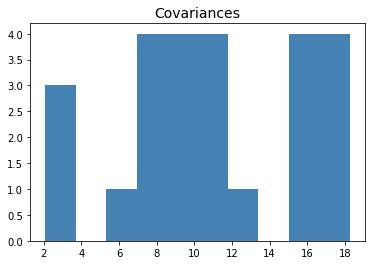

In [31]:
%matplotlib inline
import matplotlib.pylab as plt

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.set_title("Covariances", fontsize=14)
ax.hist(np.log([v for v in covmat.reshape(-1) if v > 0]), color="steelblue")
plt.show()

>**Ex. 2.2.5**: There's another use of the covariance matrix, other than just learning how features co-vary. In fact, it turns out that the *eigenvectors* of the covariance matrix are a set of mutually orthogonal vectors, that point in the directions of greatest variance in the data. The eigenvector with the greatest *eigenvalue* points along the direction of greatest variation, and so on. This is pretty neat, because if we know along which axes the data is most stretched, we can figure out how best to project it when visualizing it in 2D as a scatter plot! This whole procedure has a name: **Principal Component Analysis** (PCA) and it was invented by Karl Pearson in 1901. It belongs to a powerful class of linear algebra methods called **Matrix Factorization** methods. Ok, so rather than spending too much time on the math of PCA, let's just use the `sklearn` implementation and fit a PCA on `X`.

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

>1. Explain what the matrix you get when you call `pca.components_` means.
2. Explain what the vector you get when you call `pca.explained_variance_ratio_` means. What insights about our data can we extract from this?
3. Transform X using the PCA you just fitted, and scatter plot the first two dimensions of the transformed data. Please comment on what you see.
3. Scatter plot dimensions 1 and 3 against each other. See something interesting now? What would be a way to figure out what the clusters represent?

Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by ``explained_variance_``

How much of variance is explained by each component

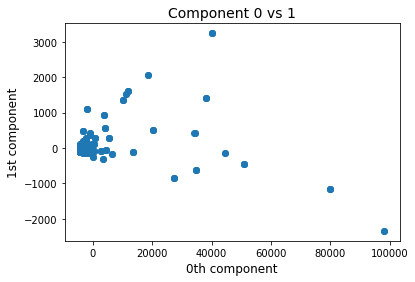

In [47]:
X_pca = pca.transform(X)

plt.figure(figsize=(6, 4))

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("Component 0 vs 1", fontsize=14)
plt.xlabel("0th component", fontsize=12)
plt.ylabel("1st component", fontsize=12)
plt.show()

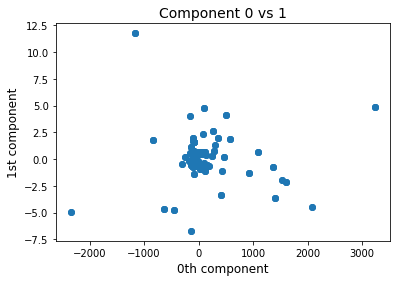

In [56]:
X_pca = pca.transform(X)

plt.figure(figsize=(6, 4))

plt.scatter(X_pca[:, 1], X_pca[:, 3])
plt.title("Component 0 vs 1", fontsize=14)
plt.xlabel("0th component", fontsize=12)
plt.ylabel("1st component", fontsize=12)
plt.show()

Cut them some slack

>**Ex. 2.3.4**: People often use the p-value to gauge the *significance* of a given result. If the p-value of a result is low, the result is significant (which is good) and vice versa. Intuitively, the p-value measures the probabilty that a result *could have been obtained at random*, so you can imagine that if you find that the p-value for some result is HIGH (close to one), regardless of how cool it is, people will not care because, well, you just got lucky with that measurement, didn't you? I created two lists for you below, and you are going to find out if they are *significantly* correlated. You will be using the significance threshold 0.05 (which is arbitrary, disputed, yet very standard in the literature).

In [57]:
# You can incresae this to make the data more noisy (but let it be 4 for now)
noise_level = 4

# I'm just seeding the random number generator here, so we can compare results
np.random.seed(0)

# This is your data
x = np.arange(0, 20) + np.random.normal(size=20) * noise_level
y = np.arange(0, 20) + np.random.normal(size=20) * noise_level

In [1]:
# Why not make a scatter plot here, to see what you're working with?

>4. Plot the p-value as a function of `noise_level` (let `noise_level` vary between 1 and 50), so we can see how our result becomes less and less significant as we increase the noise. Two questions: (1) at which value of `noise_level` does the correlation become insignificant, and (2) which p-value does the curve saturate at for large `noise_level`?

In [59]:
a, b = [], []
for noise_level in range(1, 40):
    #np.random.seed(0)
    x = np.arange(0, 20) + np.random.normal(size=20) * noise_level
    y = np.arange(0, 20) + np.random.normal(size=20) * noise_level
    
    r_real = pearsonr(x, y)[0]

    trials = []
    for _ in range(10000):
        x_shuf = np.random.choice(x, size=len(x), replace=False)
        y_shuf = np.random.choice(y, size=len(y), replace=False)
        r_shuf = pearsonr(x_shuf, y_shuf)[0]
        trials.append(r_shuf > r_real)
        
    a.append(noise_level)
    b.append(np.mean(trials))

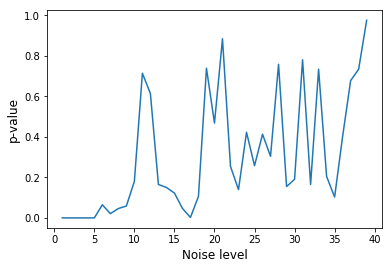

In [60]:
plt.figure(figsize=(6, 4))

plt.plot(a, b)
plt.xlabel("Noise level", fontsize=12)
plt.ylabel("p-value", fontsize=12)
plt.show()

### Week 3

>**Ex. 3.1.1**: From the Wikipedia API, get a list of all Marvel superheroes and another list of all Marvel supervillains. Use 'Category:Marvel_Comics_supervillains' and 'Category:Marvel_Comics_superheroes' to get the characters in each category.
1. How many superheroes are there? How many supervillains?
2. How many characters are both heroes and villains? What is the Jaccard similarity between the two groups?

>*Hint: Google something like "get list all pages in category wikimedia api" if you're struggling with the query.*

In [64]:
import requests as rq
import json, re

def get_list_of_chars(cla):
    """Input 'heroes' or 'villains' and return list of characters."""
    # Format query
    endpoint = "https://en.wikipedia.org/w/api.php?"
    action = "action=query"
    _list = "list=categorymembers"
    _format = "format=json"
    cmtitle = "cmtitle=Category:Marvel_Comics_super%s" % cla
    cmlimit = "cmlimit=500"
    cmcontinue = ""

    characters = []
    while True:
        query_url = "&".join([endpoint, action, _list, cmtitle, _format, cmlimit, cmcontinue])
        data = rq.get(query_url, headers={'User-agent': 'ulfs bot'}).json()
        #characters.extend([(c['title'], c['pageid']) for c in data['query']['categorymembers']])
        characters.extend([c['title'] for c in data['query']['categorymembers']])
        
        if 'continue' not in data:
            break
        
        cmcontinue = 'cmcontinue=' + data['continue']['cmcontinue']

    return characters

# Extract lists of characters
superheroes = get_list_of_chars('heroes')
supervillains = get_list_of_chars('villains')

In [67]:
print(len(superheroes))

912


In [68]:
print(len(supervillains))

1168


In [69]:
len(set(superheroes) & set(supervillains))

163

In [70]:
len(set(superheroes) & set(supervillains)) / len(set(superheroes) | set(supervillains))

0.08502869066249348

**Download the data**

In [74]:
for c in set(superheroes) | set(supervillains):
    
    # Get the faction of the character
    if c in superheroes and c in supervillains:
        folder = "ambiguous"
    elif c in superheroes:
        folder = "heroes"
    elif c in supervillains:
        folder = "villains"
    
    # Only download new pages
    if c[0] + ".txt" in os.listdir('../data/%s' % folder):
        continue

    # Replace slash with dash
    if "/" in c[0]:
        c = (c[0].replace("/", "-"), c[1])
    
    # Get the data
    data = rq.get(
        "https://en.wikipedia.org/w/api.php?&prop=revisions&rvprop=content&action=query&pageids=%d&format=json" % c[1]
    ).json()
    
    # Get the markup
    markup = data['query']['pages'].values()[0]['revisions'][0]['*']
    
    # Save it
    with open("../data/%s/%s.txt" % (folder, c[0]), 'w') as fp:
        fp.write(markup.encode('utf-8'))

TypeError: %d format: a number is required, not str

>**Ex. 3.2.1**: Extract the length of the page of each character, and plot the distribution of this variable for each class (heroes/villains/ambiguous). Can you say anything about the popularity of characters in the Marvel universe based on your visualization?

>*Hint: The simplest thing is to make a probability mass function, i.e. a normalized histogram. Use `plt.hist` on a list of page lengths, with the argument `density=True`. Other distribution plots are fine too, though.*

In [71]:
import matplotlib.pylab as plt
import os

def extract_lengths(cla):
    lengths = []
    for c in os.listdir("data/" + cla):
        with open("data/%s/%s" % (cla, c)) as fp:
            lengths.append(len(fp.read()))
    return lengths

len_heroes = extract_lengths("heroes")
len_villains = extract_lengths("villains")
len_ambiguous = extract_lengths("ambiguous")

plt.figure()
plt.hist(len_heroes, alpha=0.5, label="heroes", bins=range(0, int(1e5), int(2e3)), normed=True)
plt.hist(len_villains, alpha=0.5, label="villains", bins=range(0, int(1e5), int(2e3)), normed=True)
plt.hist(len_ambiguous, alpha=0.5, label="ambiguous", bins=range(0, int(1e5), int(2e3)), normed=True)
plt.xlabel("Page length", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/heroes'

>**Ex. 3.2.2**: Find the 10 characters from each class with the longest Wikipedia pages. Visualize their page lengths with bar charts. Comment on the result.

>**Ex. 3.2.3**: We are interested in knowing if there is a time-trend in the debut of characters.
* Extract into three lists, debut years of heroes, villains, and ambiguous characters.
* Do all pages have a debut year? Do some have multiple? How do you handle these inconsistencies?
* For each class, visualize the amount of characters introduced over time. You choose how you want to visualize this data, but please comment on your choice. Also comment on the outcome of your analysis.

>*Hint: The debut year is given on the debut row in the info table of a character's Wiki-page. There are many ways that you can extract this variable. You should try to have a go at it yourself, but if you are short on time, you can use this horribly ugly regular expression code:*

>*`re.findall(r"\d{4}\)", re.findall(r"debut.+?\n", markup_text)[0])[0][:-1]`*